------
- # 요약
    - 다변수 선형회귀
        - nn.Module
        - F.mse_loss
        - mini-batch Gradient Descent
            - torch.utils.data.DataSet
            - torch.utils.data.DataLoader
            - enumerate
            
------

# 다변수 선형회귀
- 특징이 여러 개인 선형회귀 처리방법

## 여러 변수 처리
- 변수가 많다면 더이상 가설을 하드코딩 할 수 없음
- x_train.matmul(W)
    - x의 W 에 대한 행렬곱임
    - x_train @ W 로도 동일하게 가능함
    - 그 외는 동일함

## nn.Module
- 신경망 정의에 사용함.
- 순전파는 foward() 에서 진행
- 그레디언트 계산은 backward() 에서 진행함
- nn.Module
    - nn.Linear(3,1)
        - 입력차원 3개, 출력차원 1개인 뉴런
        

## F.mse_loss
- 파이토치 제공 손실함수
- 직접 정의하는것보다 사용하기 편함
- cost= F.mse_loss(prediction,y_train)


## Minibatch Gradient Descent
- 데이터가 너무 많으면 학습에 자연상의 지장이 생김
- 한번에 처리할 수 있는 mini-batch 단위로 잘라 학습시킴
- 배치 당 분포가 다르기 때문에 학습이 진동하게 됨

- torch.utils.data.Dataset 를 상속해 데이터를 정의함
- 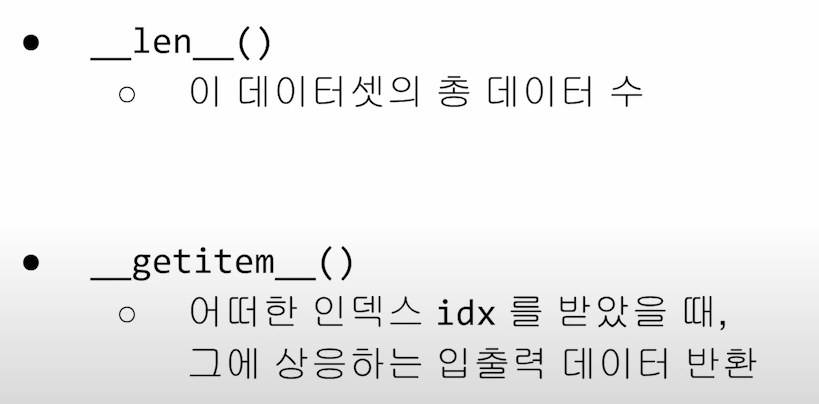
- 두 함수 정의해야함

- torch.utils.data.DataLoader 를 사용해 데이터를 로드함
- 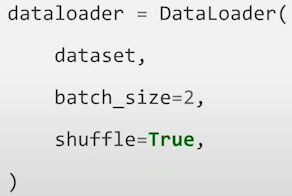
    - batch_size
        - 미니 배치의 크기
        - 관습적으로 2의 제곱수로 설정함
    - shuffle=True
        - 에포크마다 데이터셋을 섞어서 학습되는 순서를 바꿈

- 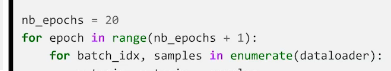
    - 배치 단위로 처리하는 for 문 만듬
    

# 전체 코드
- nn.Module 을 상속받아 모델을 정의한부분 체크

In [6]:
import torch  
import torch.nn as nn  
import torch.nn.functional as F  
import torch.optim as optim  

# 데이터  
x_train = torch.FloatTensor([[73, 80, 75],  
                          [93, 88, 93],  
                          [89, 91, 90],  
                          [96, 98, 100],  
                          [73, 66, 70]])  
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])  

# 모델 정의 (nn.Module 사용)  
class MultivariateLinearRegressionModel(nn.Module):  
    def __init__(self):  
        super().__init__()  
        self.linear = nn.Linear(3, 1)  # 입력 특성 3개, 출력 1개  
        
    def forward(self, x):  
        return self.linear(x)  

# 모델 초기화  
model = MultivariateLinearRegressionModel()  

# Optimizer 설정  
optimizer = optim.SGD(model.parameters(), lr=1e-5)  

# nn.Module 방식으로 학습  
nb_epochs = 20  
for epoch in range(nb_epochs + 1):  
    
    # H(x) 계산  
    prediction = model(x_train)  
    
    # cost 계산  
    cost = F.mse_loss(prediction, y_train)  
    
    # cost로 H(x) 개선  
    optimizer.zero_grad()  
    cost.backward()  
    optimizer.step()  
    
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(  
        epoch, nb_epochs, prediction.squeeze().detach(),  
        cost.item()  
    ))  

# 학습 완료 후 모델 예측  
print("\n===== 학습 결과 =====")  
new_data = torch.FloatTensor([[73, 80, 75]])  # 첫 번째 데이터 다시 예측  
pred_y = model(new_data)  
print("모델 예측값:", pred_y.item())  
print("실제값:", y_train[0].item())  

# 최종 가중치 및 편향  
print("\n===== 최종 파라미터 =====")  
print("모델 가중치:", model.linear.weight.data.view(-1).tolist())  
print("모델 편향:", model.linear.bias.item())

Epoch    0/20 hypothesis: tensor([50.9488, 61.9977, 60.7751, 65.5469, 47.9412]) Cost: 13084.111328
Epoch    1/20 hypothesis: tensor([ 95.6189, 115.6884, 113.6771, 123.1559,  88.8937]) Cost: 4101.639160
Epoch    2/20 hypothesis: tensor([120.6280, 145.7479, 143.2950, 155.4090, 111.8216]) Cost: 1286.110352
Epoch    3/20 hypothesis: tensor([134.6295, 162.5772, 159.8769, 173.4663, 124.6583]) Cost: 403.592316
Epoch    4/20 hypothesis: tensor([142.4683, 171.9993, 169.1605, 183.5760, 131.8451]) Cost: 126.968704
Epoch    5/20 hypothesis: tensor([146.8568, 177.2746, 174.3580, 189.2359, 135.8689]) Cost: 40.262032
Epoch    6/20 hypothesis: tensor([149.3137, 180.2280, 177.2678, 192.4047, 138.1217]) Cost: 13.083920
Epoch    7/20 hypothesis: tensor([150.6891, 181.8817, 178.8969, 194.1788, 139.3832]) Cost: 4.564784
Epoch    8/20 hypothesis: tensor([151.4590, 182.8076, 179.8089, 195.1720, 140.0895]) Cost: 1.894294
Epoch    9/20 hypothesis: tensor([151.8899, 183.3260, 180.3195, 195.7280, 140.4850]) Cost